### Práctica - Andrea Araujo


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None #mostrar todas las columnas

In [2]:

from sklearn.model_selection import train_test_split

full_df = pd.read_csv('./airbnb-listings-extract.csv', sep=';', decimal='.')
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

data = pd.read_csv('./train.csv', sep=';', decimal='.')
data.head()

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,5994463,https://www.airbnb.com/rooms/5994463,20170407214119,2017-04-08,PISO ATOCHA- FLAT NEAR ATOCHA .,Piso recién reformado cómoda habitación con ba...,"Un piso muy cómodo en Jerónimos, una de las zo...",Piso recién reformado cómoda habitación con ba...,none,El barrio de Jeronimos es un enclave tranquilo...,Facilitamos guía de eventos y rutas turísticas...,Excelente ubicación a tan solo 5 minutos andan...,La conexión a internet por fibra óptica 100 MB...,Recibimos personalmente a nuestros huéspedes y...,El apartamento se encuentra en un edificio res...,https://a0.muscache.com/im/pictures/74652419/f...,https://a0.muscache.com/im/pictures/74652419/f...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/74652419/f...,31124866,https://www.airbnb.com/users/show/31124866,Inava,2015-04-13,"Arroyomolinos, Comunidad de Madrid, Spain",NaN,within a few hours,100.0,NaN,https://a0.muscache.com/im/users/31124866/prof...,https://a0.muscache.com/im/users/31124866/prof...,Jerónimos,2.0,2.0,"email,phone,reviews,work_email","Jerónimos, Madrid, Comunidad de Madrid 28014, ...",Jerónimos,Jerónimos,Retiro,Madrid,Comunidad de Madrid,28014,Madrid,"Madrid, Spain",ES,Spain,40.407732,-3.684819,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,60.0,550.0,1250.0,NaN,25.0,1,0,2,1125,2 weeks ago,NaN,9,32,52,117,2017-04-08,12,2015-04-26,2017-02-28,95.0,9.0,10.0,10.0,10.0,10.0,9.0,NaN,NaN,moderate,2.0,0.50,"40.4077318793,-3.68481869733","Host Has Profile Pic,Is Location Exact,Require..."
1,14136180,https://www.airbnb.com/rooms/14136180,20170407214119,2017-04-08,The Palace Sol Madrid.,"Lugares de interés: Plaza Mayor, Plaza del Sol...",El apartamento dispone de un dormitorio indepe...,"Lugares de interés: Plaza Mayor, Plaza del Sol...",none,"Situado en el corazón de Madrid, este apartame...",Hora llegada: a partir de las 15:00 horas Hora...,"Acceso a todos los medios de trasporte, BUS, M...",NaN,Estimado huésped estaremos disponible todo el ...,- Oír música con volumen moderado. Entrada a p...,https://a0.muscache.com/im/pictures/1565a3a9-2...,https://a0.muscache.com/im/pictures/1565a3a9-2...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/1565a3a9-2...,85301317,https://www.airbnb.com/users/show/85301317,Apartamentos Turísticos,2016-07-22,"Madrid, Community of Madrid, Spain",Somos una empresa de turismo dedicada al aloj...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/ff7ad016-4...,https://a0.muscache.com/im/pictures/ff7ad016-4...,NaN,1.0,1.0,"email,phone,reviews,jumio,offline_government_i...","Madrid, Comunidad de Madrid 28012, Spain",NaN,Sol,Centro,Madrid,Comunidad de Madrid,280

In [3]:
data.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [4]:
#transformacion de pies2 a m2
data['Square Feet'] = data['Square Feet'].apply(lambda x: x * 0.092903)
# renombramos
data.columns = ['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square meters', 'Price', 'Weekly Price',
       'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Calendar Updated',
       'Has Availability', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Calendar last Scraped',
       'Number of Reviews', 'First Review', 'Last Review',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'License', 'Jurisdiction Names',
       'Cancellation Policy', 'Calculated host listings count',
       'Reviews per Month', 'Geolocation', 'Features']

### Eliminación columnas
-Se eliminan columnas de tipo descriptivos/url/id/ratio_respuestas, porque no aportan datos relevantes para la predicción del precio

-Se eliminan columnas de puntuaciones, ya que considero que el precio no va estrictamente relacionado con las puntuaciones. Cuanto mayor sea la puntución no tiene porque tener un precio menor o viceversa.

-Se eliminan columnas de min/max noches por no ser relevantes, ya que considero que el precio a predecir es a nivel unitario; es decir, precio de una noche. Al igual que ocurre con: Security Deposit y Cleaning Fee, considero que el valor real del piso a tener en cuenta es Price, los demás son extras que se deben descartar.

In [5]:
#eliminar columnas que no influyen en el precio
data=data.drop(['ID','Listing Url','Scrape ID', 'Neighborhood Overview', 'Last Scraped', 'Name','Summary','Space'
                , 'Description', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules'
               ,'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url'
                ,'Host ID', 'Host URL', 'Host Name', 'Host Since'
                ,'Host About', 'Host Response Time', 'Host Response Rate'
                ,'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url'
                , 'Host Listings Count','Host Total Listings Count', 'Host Verifications',
                'Amenities','Has Availability', 'Availability 30', 'Availability 60',
               'Availability 90', 'Availability 365', 'Calendar Updated',
                'Number of Reviews', 'First Review', 'Last Review',
                'Review Scores Rating', 'Review Scores Accuracy',
                'Review Scores Cleanliness', 'Review Scores Checkin',
                'Review Scores Communication', 'Review Scores Location',
                'Review Scores Value', 'License', 'Jurisdiction Names'
                , 'Features','Reviews per Month','Geolocation','Calendar last Scraped','Calculated host listings count'
                , 'Minimum Nights', 'Maximum Nights', 'Security Deposit', 'Cleaning Fee','Neighbourhood Cleansed',
                'Neighbourhood Group Cleansed'
               ], axis=1)

In [6]:
data.head()

,Experiences Offered,Host Location,Host Neighbourhood,Street,Neighbourhood,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Square meters,Price,Weekly Price,Monthly Price,Guests Included,Extra People,Cancellation Policy
0,none,"Arroyomolinos, Comunidad de Madrid, Spain",Jerónimos,"Jerónimos, Madrid, Comunidad de Madrid 28014, ...",Jerónimos,Madrid,Comunidad de Madrid,28014,Madrid,"Madrid, Spain",ES,Spain,40.407732,-3.684819,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,NaN,60.0,550.0,1250.0,1,0,moderate
1,none,"Madrid, Community of Madrid, Spain",NaN,"Madrid, Comunidad de Madrid 28012, Spain",NaN,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,40.415802,-3.705340,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,NaN,50.0,NaN,NaN,1,0,flexible
2,none,"Madrid, Community of Madrid, Spain",Carabanchel,"Carabanchel, Madrid, Comunidad de Madrid 28025...",Carabanchel,Madrid,Comunidad de Madrid,28025,Madrid,"Madrid, Spain",ES,Spain,40.389048,-3.740374,Apartment,Shared room,1,1.5,1.0,8.0,Real Bed,NaN,10.0,NaN,NaN,1,0,moderate
3,none,"Madrid, Community of Madrid, Spain",Justicia,"Madrid, Comunidad de Madrid 28012, Spain",NaN,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,40.412814,-3.703052,Apartment,Private room,2,3.0,1.0,1.0,Real Bed,NaN,30.0,NaN,NaN,1,0,strict
4,none,"Madrid, Community of Madrid, Spain",Gaztambide,"Gaztambide, Madrid, 28 28015, Spain",Gaztambide,Madrid,28,28015,Madrid,"Madrid, Spain",ES,Spain,40.438631,-3.713716,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,NaN,32.0,NaN,NaN,1,10,strict


### ANALISIS EXPLORATORIO

In [7]:
data.shape

(11824, 28)

In [8]:
data.isnull().sum()

Experiences Offered        0
Host Location             34
Host Neighbourhood      3082
Street                     0
Neighbourhood           4159
City                       4
State                    119
Zipcode                  398
Market                    44
Smart Location             0
Country Code               0
Country                    1
Latitude                   0
Longitude                  0
Property Type              0
Room Type                  0
Accommodates               0
Bathrooms                 44
Bedrooms                  20
Beds                      37
Bed Type                   0
Square meters          11350
Price                     15
Weekly Price            8943
Monthly Price           8955
Guests Included            0
Extra People               0
Cancellation Policy        0
dtype: int64

Decido eliminar columnas: Square meters,Host Neighbourhood,Neighbourhood, Weekly Price y Monthly Price; ya que la mayor parte de su valores son nulos.
En el caso de hacer imputación, la mayoría de sus valores no serían reales por lo que no serían útiles.

In [9]:
data=data.drop(['Square meters','Host Neighbourhood','Neighbourhood','Weekly Price','Monthly Price'], axis=1)

In [10]:
data.isnull().sum()

Experiences Offered      0
Host Location           34
Street                   0
City                     4
State                  119
Zipcode                398
Market                  44
Smart Location           0
Country Code             0
Country                  1
Latitude                 0
Longitude                0
Property Type            0
Room Type                0
Accommodates             0
Bathrooms               44
Bedrooms                20
Beds                    37
Bed Type                 0
Price                   15
Guests Included          0
Extra People             0
Cancellation Policy      0
dtype: int64

In [11]:
#imputar datos nulos
data["Host Location"].fillna(data["Host Location"].mode()[0], inplace=True)
data["City"].fillna(data["City"].mode()[0], inplace=True)
data["State"].fillna(data["State"].mode()[0], inplace=True)
data["Zipcode"].fillna(data["Zipcode"].mode()[0], inplace=True)
data["Country"].fillna(data["Country"].mode()[0], inplace=True)
data["Market"].fillna(data["Market"].mode()[0], inplace=True)
data["Bathrooms"].fillna(data["Bathrooms"].mode()[0], inplace=True)
data["Bedrooms"].fillna(data["Bedrooms"].mode()[0], inplace=True)
data["Beds"].fillna(data["Beds"].mode()[0], inplace=True)

Decido eliminar las filas con precios nulos(muy pocos nulos 15), para que los precios sean lo más reales posibles.

In [12]:
data =data[data["Price"].isnull()==False]

In [13]:
data.shape

(11809, 23)

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,11809.0,40.485979,4.695057,-37.851182,40.409757,40.419315,40.430754,55.966912
Longitude,11809.0,-3.784060,14.020002,-123.124429,-3.707543,-3.700771,-3.683962,153.371427
Accommodates,11809.0,3.273605,2.088509,1.000000,2.000000,3.000000,4.000000,16.000000
Bathrooms,11809.0,1.282835,0.659375,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,11809.0,1.342027,0.900803,0.000000,1.000000,1.000000,2.000000,10.000000
Beds,11809.0,2.043357,1.615993,1.000000,1.000000,2.000000,2.000000,16.000000
Price,11809.0,73.712592,71.624844,9.000000,34.000000,55.000000,87.000000,969.000000
Guests Included,11809.0,1.580574,1.153438,0.000000,1.000000,1.000000,2.000000,16.000000
Extra People,11809.0,7.557710,11.160882,0.000000,0.000000,0.000000,15.000000,276.000000


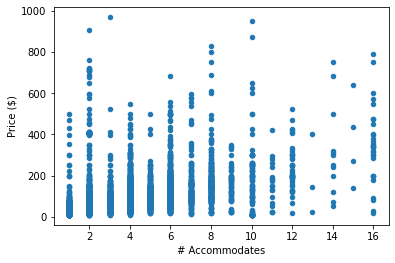

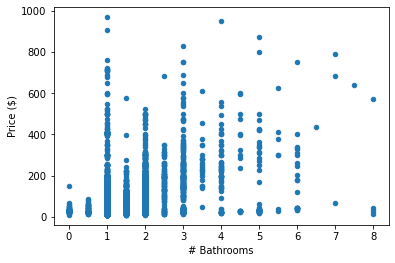

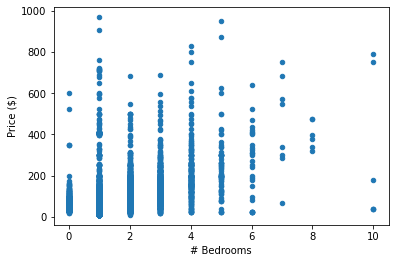

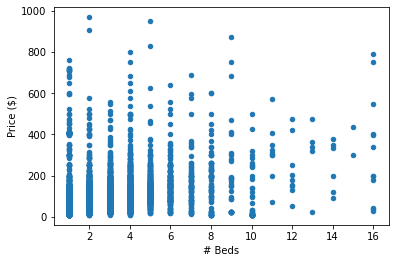

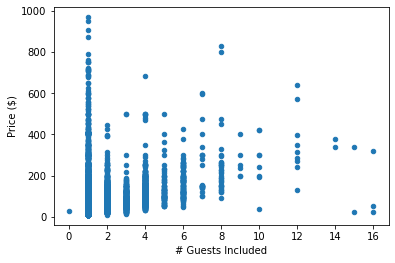

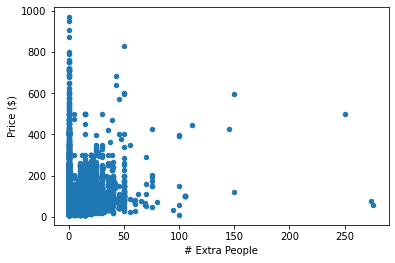

In [15]:
data.plot(kind = 'scatter',x='Accommodates',y = 'Price')
plt.xlabel('# Accommodates')
plt.ylabel('Price ($)')
plt.show()

data.plot(kind = 'scatter',x='Bathrooms',y = 'Price')
plt.xlabel('# Bathrooms')
plt.ylabel('Price ($)')
plt.show()

data.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('# Bedrooms')
plt.ylabel('Price ($)')
plt.show()

data.plot(kind = 'scatter',x='Beds',y = 'Price')
plt.xlabel('# Beds')
plt.ylabel('Price ($)')
plt.show()

data.plot(kind = 'scatter',x='Guests Included',y = 'Price')
plt.xlabel('# Guests Included')
plt.ylabel('Price ($)')
plt.show()

data.plot(kind = 'scatter',x='Extra People',y = 'Price')
plt.xlabel('# Extra People')
plt.ylabel('Price ($)')
plt.show()


#### Quitar outliers
A partir de las gráficas anteriores,examino por cada variable los posibles outliers;es decir, los valores extremos que no aportan información relevante. Si los outliers detectados suponen un bajo porcentaje de datos, se eliminan.

In [16]:
data_filtered_Bathrooms = data[data['Bathrooms'] <= 6]
print(f'Bathrooms: Quitar > 6')
print(f'Original: {data.shape[0]}\nFiltered: {data_filtered_Bathrooms.shape[0]}')
print(f'Diferencia: {(data.shape[0] - data_filtered_Bathrooms.shape[0])/data.shape[0]*100}%')
print(f'\n')
#Quitamos outliers, ya que perdemos pocos registros

data_filtered_Bedrooms = data[data['Bedrooms'] <= 8 ]
print(f'Bedrooms: Quitar > 8')
print(f'Original: {data.shape[0]}\nFiltered: {data_filtered_Bedrooms.shape[0]}')
print(f'Diferencia: {(data.shape[0] - data_filtered_Bedrooms.shape[0])/data.shape[0]*100}%')
print(f'\n')
#Quitamos outliers, ya que perdemos pocos registros

data_filtered_Guests_Included = data[data['Guests Included'] <= 12]
print(f'Extra People: Quitar > 12')
print(f'Original: {data.shape[0]}\nFiltered: {data_filtered_Guests_Included.shape[0]}')
print(f'Diferencia: {(data.shape[0] - data_filtered_Guests_Included.shape[0])/data.shape[0]*100}%')
print(f'\n')
#Quitamos outliers, ya que perdemos pocos registros

data_filtered_extra_People = data[data['Extra People'] <= 100]
print(f'Guests Included: Quitar > 100')
print(f'Original: {data.shape[0]}\nFiltered: {data_filtered_extra_People.shape[0]}')
print(f'Diferencia: {(data.shape[0] - data_filtered_extra_People.shape[0])/data.shape[0]*100}%')
#Quitamos outliers, ya que perdemos pocos registros

data = data[data['Bathrooms'] <= 6]
data = data[data['Bedrooms'] <= 8 ]
data = data[data['Guests Included'] <= 12]
data = data[data['Extra People'] <= 100]

Bathrooms: Quitar > 6
Original: 11809
Filtered: 11800
Diferencia: 0.07621305783724278%


Bedrooms: Quitar > 8
Original: 11809
Filtered: 11803
Diferencia: 0.05080870522482852%


Extra People: Quitar > 12
Original: 11809
Filtered: 11802
Diferencia: 0.05927682276229994%


Guests Included: Quitar > 100
Original: 11809
Filtered: 11797
Diferencia: 0.10161741044965704%


#### Correlación

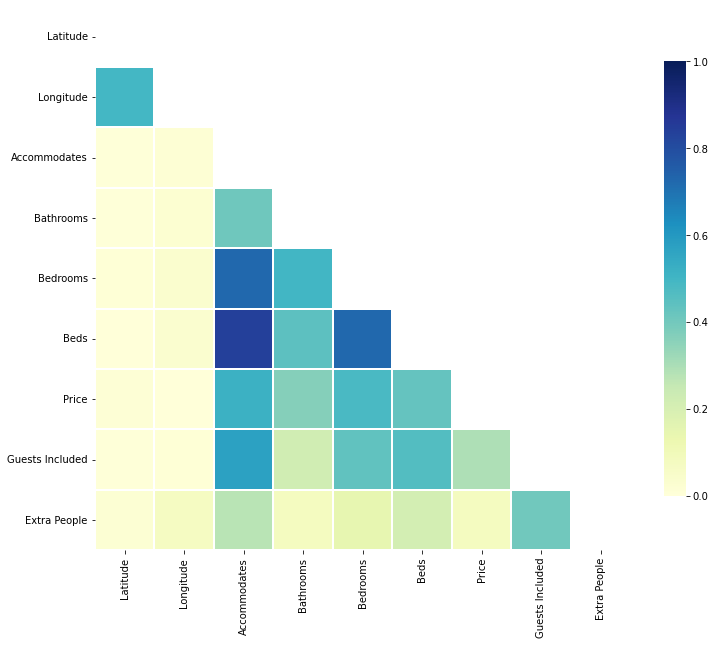

In [17]:
import seaborn as sns

# Compute the correlation matrix
#corr = np.abs(data.drop(['Price'], axis=1).corr())
corr = np.abs(data.corr())
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

En la matriz de correlación podemos observar que las variables: Latitud, Longitud,Extra People y Guests Included no son buenas predictoras por su baja correlación con Price

In [18]:
data=data.drop(['Latitude','Longitude','Extra People','Guests Included'], axis=1)

### PREPOCESAMIENTO

In [19]:
data.dtypes

Experiences Offered     object
Host Location           object
Street                  object
City                    object
State                   object
Zipcode                 object
Market                  object
Smart Location          object
Country Code            object
Country                 object
Property Type           object
Room Type               object
Accommodates             int64
Bathrooms              float64
Bedrooms               float64
Beds                   float64
Bed Type                object
Price                  float64
Cancellation Policy     object
dtype: object

In [20]:
#codificar variables:
from sklearn.preprocessing import LabelEncoder

le_state = LabelEncoder()
le_state.fit(data['Experiences Offered'])
data['Experiences Offered'] = le_state.transform(data['Experiences Offered'])

le_state = LabelEncoder()
le_state.fit(data['Host Location'])
data['Host Location'] = le_state.transform(data['Host Location'])

le_state = LabelEncoder()
le_state.fit(data['Street'])
data['Street'] = le_state.transform(data['Street'])

le_state = LabelEncoder()
le_state.fit(data['City'])
data['City'] = le_state.transform(data['City'])

le_state = LabelEncoder()
le_state.fit(data['State'])
data['State'] = le_state.transform(data['State'])

le_state = LabelEncoder()
le_state.fit(data['Zipcode'])
data['Zipcode'] = le_state.transform(data['Zipcode'])

le_state = LabelEncoder()
le_state.fit(data['Market'])
data['Market'] = le_state.transform(data['Market'])

le_state = LabelEncoder()
le_state.fit(data['Smart Location'])
data['Smart Location'] = le_state.transform(data['Smart Location'])

le_state = LabelEncoder()
le_state.fit(data['Country Code'])
data['Country Code'] = le_state.transform(data['Country Code'])

le_state = LabelEncoder()
le_state.fit(data['Country'])
data['Country'] = le_state.transform(data['Country'])

le_state = LabelEncoder()
le_state.fit(data['Property Type'])
data['Property Type'] = le_state.transform(data['Property Type'])

le_state = LabelEncoder()
le_state.fit(data['Room Type'])
data['Room Type'] = le_state.transform(data['Room Type'])

le_state = LabelEncoder()
le_state.fit(data['Bed Type'])
data['Bed Type'] = le_state.transform(data['Bed Type'])

le_state = LabelEncoder()
le_state.fit(data['Cancellation Policy'])
data['Cancellation Policy'] = le_state.transform(data['Cancellation Policy'])

In [21]:
data.dtypes

Experiences Offered      int32
Host Location            int32
Street                   int32
City                     int32
State                    int32
Zipcode                  int32
Market                   int32
Smart Location           int32
Country Code             int32
Country                  int32
Property Type            int32
Room Type                int32
Accommodates             int64
Bathrooms              float64
Bedrooms               float64
Beds                   float64
Bed Type                 int32
Price                  float64
Cancellation Policy      int32
dtype: object

In [22]:
data.shape

(11776, 19)

Se aplica Random Forest para descartar variables poco relevantes.


In [23]:
from sklearn.model_selection import train_test_split
# convertimos el DataFrame al formato necesario para scikit-learn
datanp = data.values 

datac=data.drop(['Price'], axis=1)
feature_names = datac.columns[:]

y = datanp[:,17]     # nos quedamos con la columna, price
datanp= np.delete(datanp, 17, axis=1) # quitamos la columna price
X = datanp[:,:] 

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=2; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.2s
[CV] END ........................................max_depth=3; total time=   0.2s
[CV] END .......................................

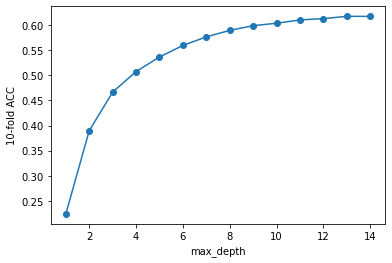

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# grid search
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth} #  {'max_depth': maxDepth, 'n_estimators': [100, 200, 500, 1000]}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), 
                    param_grid=tuned_parameters,cv=5, verbose=2) 
grid.fit(X, y)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

He decido elegir el valor max_depth =10,a pesar de que el proceso ha escogido max_depth = 14,
ya que la diferencia entre las ACC es baja y max_depth = 10 reduce la complejidad. 

In [25]:
maxDepthOptimo = 10     #grid.best_params_['max_depth']
randonFModel = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X,y)

print("Train: ",randonFModel.score(X,y))

Train:  0.7492080782166997


El resultado obtenido podría mejorar si se sube el max_depth, pero perdería generalidad y aumentaría la complejidad, por lo que decido no modificarlo


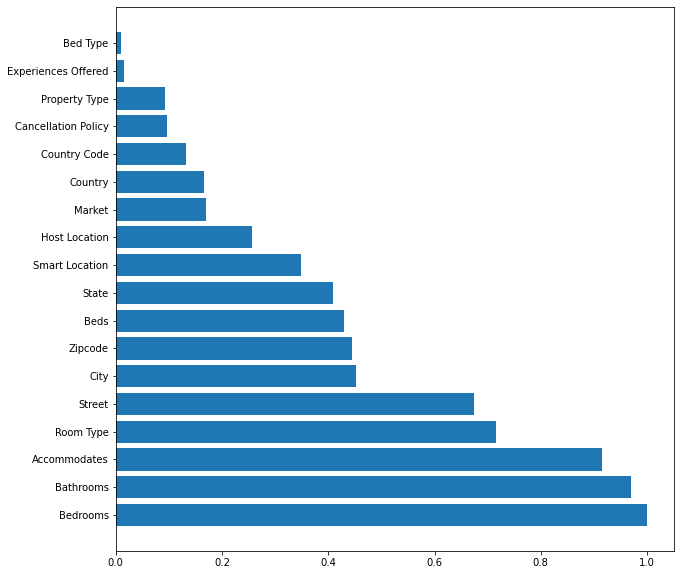

In [26]:
importances = randonFModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X.shape[1]),importances[indices])
plt.yticks(range(X.shape[1]),feature_names[indices])
plt.show()


Como se puede observar la gráfica de importancia de variables, la variable más relevante es Bedrooms y la que menos Bed Type.
Según los datos obtenidos, decido mantener las 7 variables más relevantes y descarto el resto.

In [27]:
data=data.drop([ 'Cancellation Policy','Bed Type','Experiences Offered','Property Type','Country Code','Country','Market','Host Location'
               ,'City','Zipcode','State'], axis=1)

## MODELADO

#### Se aplica SVR

In [28]:
from sklearn import preprocessing
from sklearn.svm import SVR
# convertimos el DataFrame al formato necesario para scikit-learn
data = data.values 

In [29]:
y = data[:,7]     # nos quedamos con la columna price
X = data[:,0:7]      # nos quedamos con el resto


#NORMALIZAR
scaler = preprocessing.StandardScaler().fit(X)
XtrainScaled = scaler.transform(X)

In [30]:
from sklearn.model_selection import RandomizedSearchCV
vectorC = np.logspace(-1, 5,1000)
vectorG = np.logspace(-1, 4, 70)

param_grid = {'C': vectorC, 'gamma':vectorG}
#grid = GridSearchCV(SVR(kernel='rbf'), param_grid=param_grid, cv = 5, verbose=1)
grid = RandomizedSearchCV(SVR(kernel='rbf'), param_distributions = param_grid, cv = 5, verbose=1)
grid.fit(XtrainScaled, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVR(),
                   param_distributions={'C': array([1.00000000e-01, 1.01392541e-01, 1.02804473e-01, 1.04236067e-01,
       1.05687597e-01, 1.07159340e-01, 1.08651577e-01, 1.10164595e-01,
       1.11698682e-01, 1.13254132e-01, 1.14831241e-01, 1.16430313e-01,
       1.18051653e-01, 1.19695570e-01, 1.21362380e-01, 1.23052400e-01,
       1.24765955e-01, 1.26503372e-01, 1.282649...
       1.54314166e+02, 1.82334800e+02, 2.15443469e+02, 2.54564067e+02,
       3.00788252e+02, 3.55405904e+02, 4.19941123e+02, 4.96194760e+02,
       5.86294665e+02, 6.92755066e+02, 8.18546731e+02, 9.67179864e+02,
       1.14280206e+03, 1.35031404e+03, 1.59550640e+03, 1.88522122e+03,
       2.22754295e+03, 2.63202406e+03, 3.10995155e+03, 3.67466194e+03,
       4.34191342e+03, 5.13032558e+03, 6.06189899e+03, 7.16262912e+03,
       8.46323172e+03, 1.00000000e+04])},
                   verbose=1)

In [31]:
Copt = grid.best_params_['C']
Gopt = grid.best_params_['gamma']

svmModel = SVR(kernel='rbf',gamma = Gopt, C = Copt).fit(XtrainScaled,y)
#print('Acc (TEST): %0.2f'%svmModel.score(XtestScaled,y_test))
print('Acc (TRAIN): %0.8f'%svmModel.score(XtrainScaled,y))
#print('Acc (TEST): %0.2f'%svmModel.score(XtestScaled,y_test))

Acc (TRAIN): 0.52837511


## EVALUACIÓN

Todo lo entrenado se aplica ahora sobre los datos de test

In [32]:
data_test = pd.read_csv('./test.csv', sep=';', decimal='.')

In [33]:
#transformacion de pies2 a m2
data_test['Square Feet'] = data_test['Square Feet'].apply(lambda x: x * 0.092903)
# renombramos
data_test.columns = ['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square meters', 'Price', 'Weekly Price',
       'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Calendar Updated',
       'Has Availability', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Calendar last Scraped',
       'Number of Reviews', 'First Review', 'Last Review',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'License', 'Jurisdiction Names',
       'Cancellation Policy', 'Calculated host listings count',
       'Reviews per Month', 'Geolocation', 'Features']
  
 #eliminar columnas que no influyen en el precio
data_test=data_test.drop(['ID','Listing Url','Scrape ID', 'Neighborhood Overview', 'Last Scraped', 'Name','Summary','Space'
 , 'Description', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules'
,'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url'
 ,'Host ID', 'Host URL', 'Host Name', 'Host Since'
 ,'Host About', 'Host Response Time', 'Host Response Rate'
 ,'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url'
 , 'Host Listings Count','Host Total Listings Count', 'Host Verifications',
 'Amenities','Has Availability', 'Availability 30', 'Availability 60',
'Availability 90', 'Availability 365', 'Calendar Updated',
 'Number of Reviews', 'First Review', 'Last Review',
 'Review Scores Rating', 'Review Scores Accuracy',
 'Review Scores Cleanliness', 'Review Scores Checkin',
 'Review Scores Communication', 'Review Scores Location',
 'Review Scores Value', 'License', 'Jurisdiction Names'
 , 'Features','Reviews per Month','Geolocation','Calendar last Scraped','Calculated host listings count'
 , 'Minimum Nights', 'Maximum Nights', 'Security Deposit', 'Cleaning Fee','Neighbourhood Cleansed',
 'Neighbourhood Group Cleansed'
], axis=1)

data_test=data_test.drop(['Square meters','Host Neighbourhood','Neighbourhood','Weekly Price','Monthly Price'], axis=1)

#imputar datos nulos
data_test["Host Location"].fillna(data_test["Host Location"].mode()[0], inplace=True)
data_test["City"].fillna(data_test["City"].mode()[0], inplace=True)
data_test["State"].fillna(data_test["State"].mode()[0], inplace=True)
data_test["Zipcode"].fillna(data_test["Zipcode"].mode()[0], inplace=True)
data_test["Country"].fillna(data_test["Country"].mode()[0], inplace=True)
data_test["Market"].fillna(data_test["Market"].mode()[0], inplace=True)
data_test["Bathrooms"].fillna(data_test["Bathrooms"].mode()[0], inplace=True)
data_test["Bedrooms"].fillna(data_test["Bedrooms"].mode()[0], inplace=True)
data_test["Beds"].fillna(data_test["Beds"].mode()[0], inplace=True)

data_test =data_test[data_test["Price"].isnull()==False]

#quitar outliers

data_test = data_test[data_test['Bathrooms'] <= 6]
data_test = data_test[data_test['Bedrooms'] <= 8 ]
data_test = data_test[data_test['Guests Included'] <= 12]
data_test = data_test[data_test['Extra People'] <= 100]

data_test=data_test.drop(['Latitude','Longitude','Extra People','Guests Included'], axis=1)

In [34]:
#codificar variables:
le_state = LabelEncoder()
le_state.fit(data_test['Experiences Offered'])
data_test['Experiences Offered'] = le_state.transform(data_test['Experiences Offered'])

le_state = LabelEncoder()
le_state.fit(data_test['Host Location'])
data_test['Host Location'] = le_state.transform(data_test['Host Location'])

le_state = LabelEncoder()
le_state.fit(data_test['Street'])
data_test['Street'] = le_state.transform(data_test['Street'])

le_state = LabelEncoder()
le_state.fit(data_test['City'])
data_test['City'] = le_state.transform(data_test['City'])

le_state = LabelEncoder()
le_state.fit(data_test['State'])
data_test['State'] = le_state.transform(data_test['State'])

le_state = LabelEncoder()
le_state.fit(data_test['Zipcode'])
data_test['Zipcode'] = le_state.transform(data_test['Zipcode'])

le_state = LabelEncoder()
le_state.fit(data_test['Market'])
data_test['Market'] = le_state.transform(data_test['Market'])

le_state = LabelEncoder()
le_state.fit(data_test['Smart Location'])
data_test['Smart Location'] = le_state.transform(data_test['Smart Location'])

le_state = LabelEncoder()
le_state.fit(data_test['Country Code'])
data_test['Country Code'] = le_state.transform(data_test['Country Code'])

le_state = LabelEncoder()
le_state.fit(data_test['Country'])
data_test['Country'] = le_state.transform(data_test['Country'])

le_state = LabelEncoder()
le_state.fit(data_test['Property Type'])
data_test['Property Type'] = le_state.transform(data_test['Property Type'])

le_state = LabelEncoder()
le_state.fit(data_test['Room Type'])
data_test['Room Type'] = le_state.transform(data_test['Room Type'])

le_state = LabelEncoder()
le_state.fit(data_test['Bed Type'])
data_test['Bed Type'] = le_state.transform(data_test['Bed Type'])

le_state = LabelEncoder()
le_state.fit(data_test['Cancellation Policy'])
data_test['Cancellation Policy'] = le_state.transform(data_test['Cancellation Policy'])

data_test=data_test.drop([ 'Cancellation Policy','Bed Type','Experiences Offered','Property Type','Country Code','Country','Market','Host Location'
               ,'City','Zipcode','State'], axis=1)

In [35]:
data_test.columns
data_test=data_test.values

In [36]:

y_test = data_test[:,7]     # nos quedamos con la columna price
X_test = data_test[:,0:7]      # nos quedamos con el resto

#NORMALIZAR
XtestScaled = scaler.transform(X_test)

#svmModel = SVR(kernel='rbf',gamma = Gopt, C = Copt).fit(XtestScaled,y_test)
#print('Acc (TEST): %0.2f'%svmModel.score(XtestScaled,y_test))


svmModel = SVR(kernel='rbf',gamma = Gopt, C = Copt).fit(XtrainScaled,y)
print('Acc (TEST): %0.2f'%svmModel.score(XtestScaled,y_test))

Acc (TEST): 0.32


## CONLUSIÓN

El modelo conseguido no es bueno, ya que tiene un bajo valor de predicción en train y , por lo tanto, tambien en test. La solución estaría en modificar los parámetros de vectorC y vectorG, para aumentar el barrido. Además, el uso de GridSearchCV(), en vez de RandomizedSearchCV(), mejoraría el resultado ya quebusca el valor ópttimo para C.